<a href="https://www.kaggle.com/code/mmellinger66/titanic-eda01-biased-outliers?scriptVersionId=105687376" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Biased Outliers Titanic EDA

This is Work in Progress and is a learning exercise for our Machine Learning Study Group.

# Outline


- Library Imports
- Load Data
- Data Overview
  - First 5 rows of the data
  - Shape of the data
  - Missing Values
  - Percentage of Null Values
  - Describe Data
  - Outlier Detection
- Features
  - Distributions
- Target Variable
  - Distribution
  - Target and Missing Values
- Correlations
  - Correlation Matrix
  - Correlations for Target
- Features Engineering
  - Continuous Features
    - Log of Continuous Features
    - Minimum and Log Minimum of All Continuous Features
    - Maximum and Log Maximum of All Continuous Features
    - Sum and Log Sum of All Continuous Features
    - Multiplication and Log Multiplication of All Continuous Features
    - Prorate of All Continuous Features
    - Log Prorate of All Continuous Features
  - Target Encoding
    - Mean Encoding
    - Minimum Encoding
    - Maximum Encoding
- Baseline
- Other Solutions

# Notebook References

- https://www.datacamp.com/community/tutorials/kaggle-machine-learning-eda
- https://www.kaggle.com/dejavu23/titanic-eda-to-ml-beginner
- https://www.kaggle.com/snikhil17/making-basic-eda-attractive
- https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
- https://www.kaggle.com/desalegngeb/march-tps-eda-visualizations
- https://www.kaggle.com/dwin183287/tps-september-2021-eda

# Programming References

## Seaborn

- https://www.geeksforgeeks.org/seaborn-color-palette/
- https://www.codecademy.com/articles/seaborn-design-ii
- https://chrisalbon.com/code/python/data_visualization/seaborn_color_palettes/

The data:
   - 8 categorical variables: **Cabin, Embarked, Name, Parch Pclass, Sex, SibSp, Ticket**
   - 2 continuous variables: **Age, Fare**
   - 1 binary target column: **Survived**

# Import Libraries

In [1]:
from pathlib import Path

import numpy as np 
import pandas as pd

import missingno as msno

# Visualization Libraries
import matplotlib.pylab as plt
import seaborn as sns

import warnings # Enable warnings for cleaner code
#warnings.filterwarnings('ignore')
%matplotlib inline



## Configuration

In [2]:
class Config:
    path = "../input/titanic/"

In [3]:
TARGET = "Survived"

## Theming

Make the EDA configurable so we can reuse with a different style

In [4]:
from itertools import cycle

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

plt.style.use('ggplot') # 'fivethirtyeight'

# plt.style.available

plt.rcParams["figure.figsize"] = (12, 8) # Default figure size

## Library

Create a library of reusable functions.

In [5]:
def read_data(path):
    data_dir = Path(path)

    train = pd.read_csv(data_dir / "train.csv")
    test = pd.read_csv(data_dir / "test.csv")
    submission_df = pd.read_csv(data_dir / "gender_submission.csv")

    print(f"train data: Rows={train.shape[0]}, Columns={train.shape[1]}")
    print(f"test data : Rows={test.shape[0]}, Columns={test.shape[1]}")
    return train, test, submission_df

# Load Data

In [6]:
train, test, sample_submission = read_data(Config.path)

train data: Rows=891, Columns=12
test data : Rows=418, Columns=11


# Data Overview

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Missing Data

<AxesSubplot:>

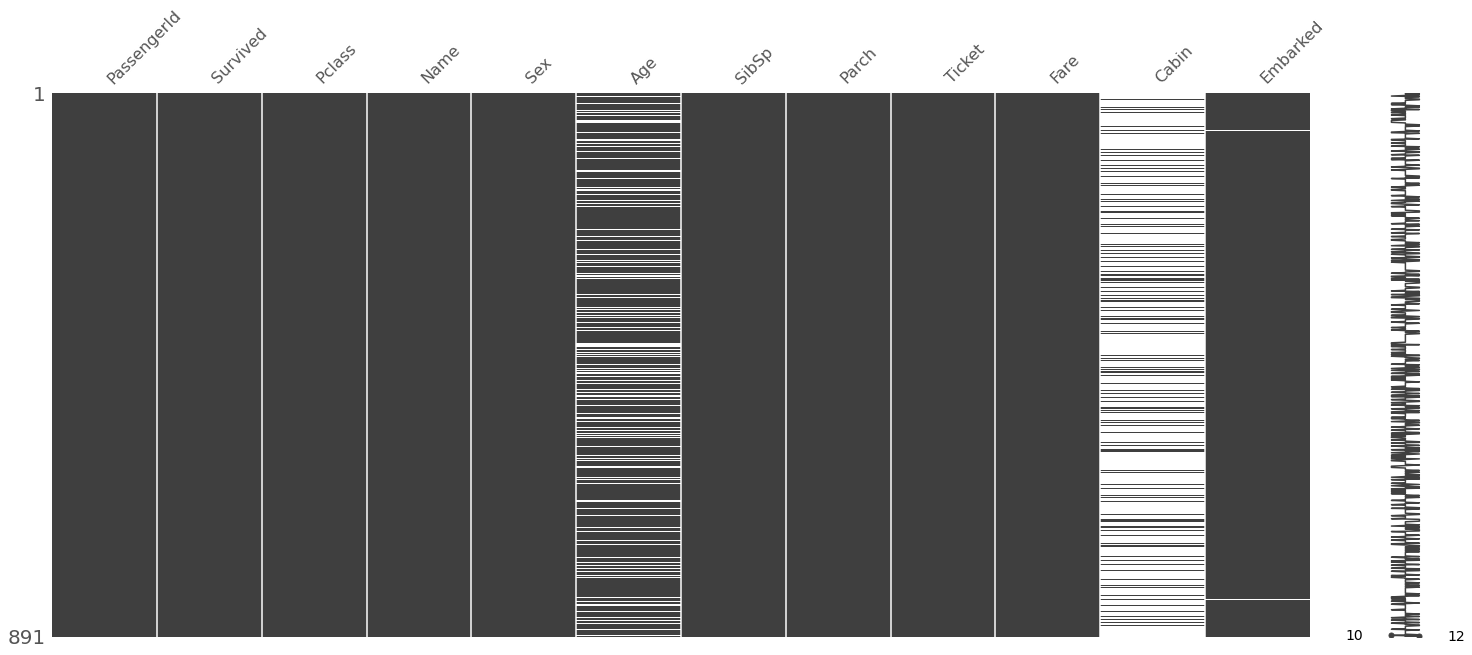

In [9]:
msno.matrix(train)

<AxesSubplot:>

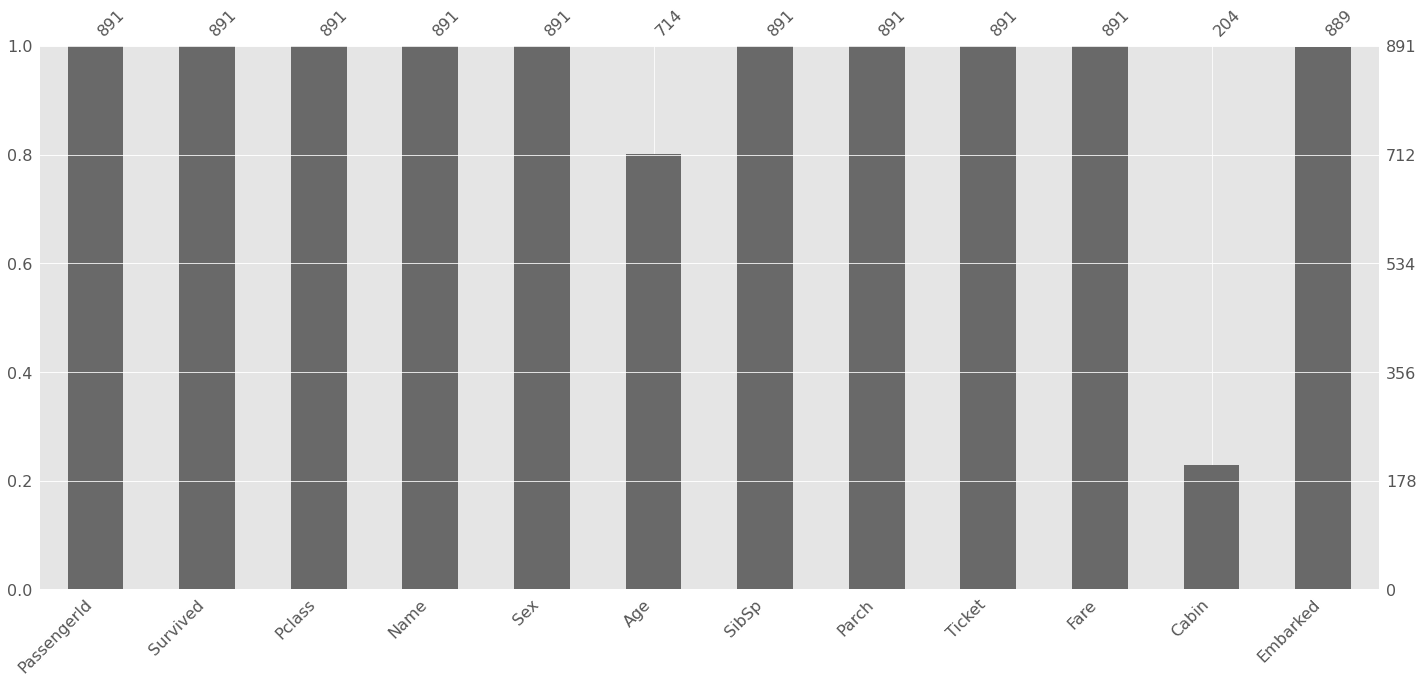

In [10]:
msno.bar(train)

# Percentage of Null Values

In [11]:
total_missing = train.isnull().sum().sum()
print(f"Total number missing values: {total_missing}")

Total number missing values: 866


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

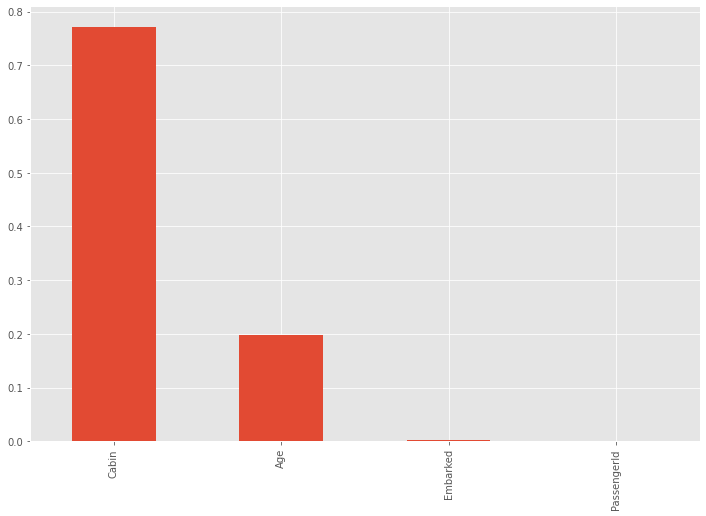

In [13]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending = False).head(4).plot(kind='bar');

# Figure out a better way to exclude zero rows

In [14]:
train.isnull().sum().sort_values(ascending = False).to_frame().head(70).rename({0:'Counts'}, axis = 1).T.style.background_gradient('crest')

,Cabin,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
Counts,687,177,2,0,0,0,0,0,0,0,0,0


,Cabin,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
%age,77.100000,19.870000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


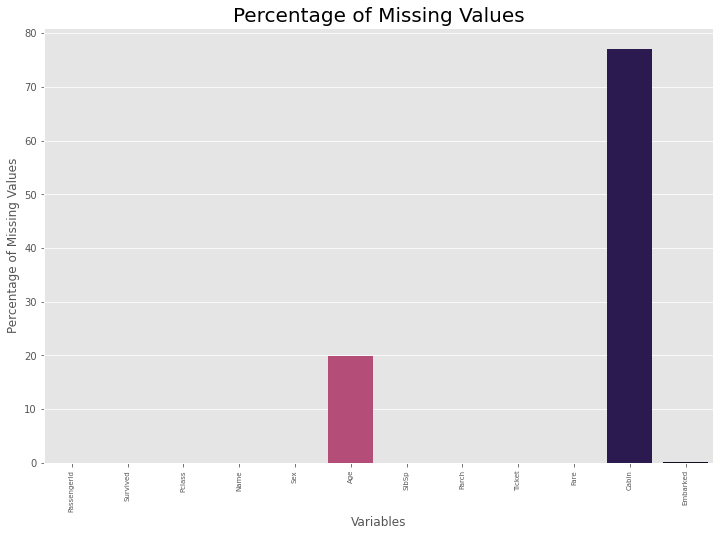

In [15]:
#printing only 70 columns with highest percentage of Null values
display(round((train.isnull().sum() / (len(train.index)) * 100) , 2).sort_values(ascending = False).head(70).to_frame().rename({0:'%age'}, axis = 1).T.style.background_gradient('magma_r'))
print()
missing = (train.isnull().sum() / (len(train.index)) * 100).to_frame().reset_index().rename({0:'%age'}, axis = 1)
ax = sns.barplot(missing['index'],missing['%age'], palette  = 'magma_r')
plt.title("Percentage of Missing Values", fontsize = 20)
plt.xticks(fontsize =7, rotation = 90)
plt.xlabel("Variables")
plt.ylabel("Percentage of Missing Values")
plt.show();

# Describe Data

- count
- mean
- standard deviation
- minimum
- 1st quartile
- median
- 3rd quartile
- maximum


In [16]:
train.describe().transpose().style.background_gradient(cmap='autumn').set_precision(4)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0000,446.0000,257.3538,1.0000,223.5000,446.0000,668.5000,891.0000
Survived,891.0000,0.3838,0.4866,0.0000,0.0000,0.0000,1.0000,1.0000
Pclass,891.0000,2.3086,0.8361,1.0000,2.0000,3.0000,3.0000,3.0000
Age,714.0000,29.6991,14.5265,0.4200,20.1250,28.0000,38.0000,80.0000
SibSp,891.0000,0.5230,1.1027,0.0000,0.0000,0.0000,1.0000,8.0000
Parch,891.0000,0.3816,0.8061,0.0000,0.0000,0.0000,0.0000,6.0000
Fare,891.0000,32.2042,49.6934,0.0000,7.9104,14.4542,31.0000,512.3292


# Separate target from features


In [17]:
y = train[TARGET]
# features = train.drop(['target', 'id'], axis=1)
features = train.drop(['Survived'], axis=1)
# test.drop(['id'], axis = 1, inplace = True)

# Preview features
features.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Target Variable

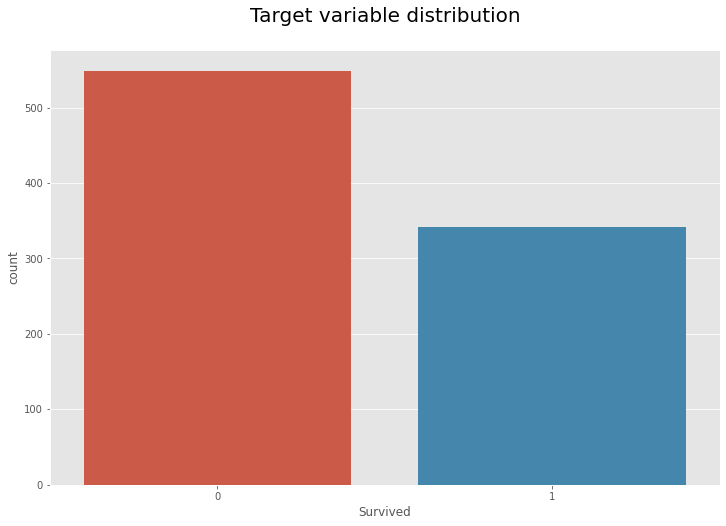

In [18]:
ax = sns.countplot(x='Survived', data=train);
ax.set_title('Target variable distribution', fontsize=20, y=1.05);
# sns.despine(right=True)
# sns.despine(offset=10, trim=True)

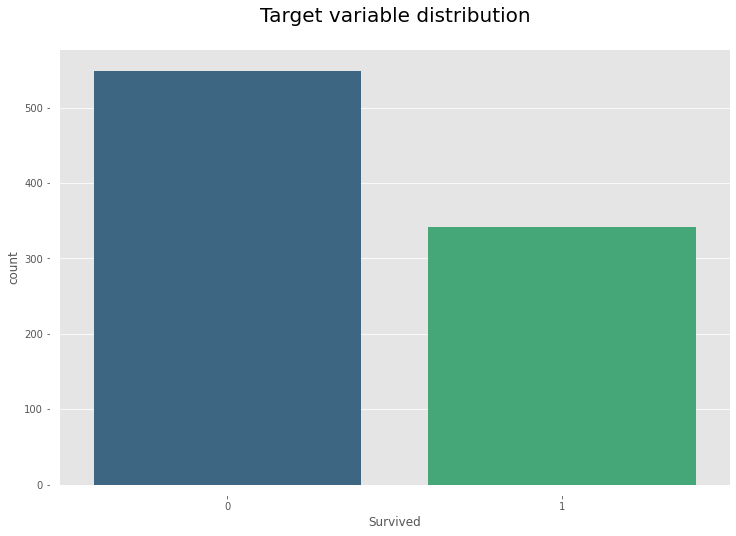

In [19]:
# plt.figure(figsize=(8, 6))
ax = sns.countplot(x=train['Survived'], palette='viridis')
ax.set_title('Target variable distribution', fontsize=20, y=1.05)

sns.despine(right=True)
sns.despine(offset=10, trim=True)

# Calculate Target Ratio

For binary class, we don't want it to be out of balance

In [20]:
percent_survived = train.Survived.sum()/train.Survived.count()
print(f"Class: 0 = {1 - percent_survived:.2f} 1 = {percent_survived:.2f}")

Class: 0 = 0.62 1 = 0.38


# Features

In [21]:
cont_cols = ['Age', 'Fare']

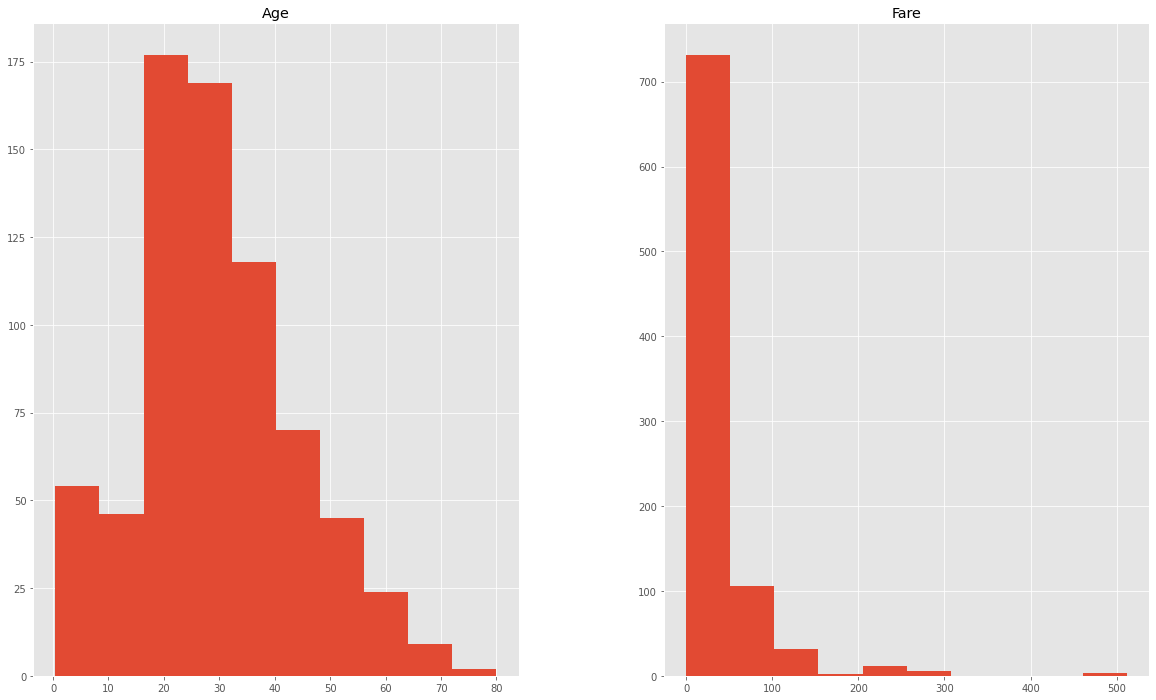

In [22]:
train[cont_cols].hist(figsize=(20,12))
plt.show()

In [23]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train.select_dtypes(include=['object', 'bool']).columns

# Numerical Features

In [24]:
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

# Categorical Features

In [25]:
# cat_cols = ['Cabin', 'Embarked', 'Name', 'Parch' 'Pclass', 'Sex', 'SibSp', 'Ticket']
cat_cols = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

- https://www.kaggle.com/subinium/tabularplayground-feb-eda-visualization

In [26]:
for col in cat_cols:
#     print (col)
#     print(train[col].dropna())
    print (col, sorted(train[col].dropna().unique()))

Embarked ['C', 'Q', 'S']
Parch [0, 1, 2, 3, 4, 5, 6]
Pclass [1, 2, 3]
Sex ['female', 'male']
SibSp [0, 1, 2, 3, 4, 5, 8]


# Feature: Sex

### Crosstab

In [27]:
pd.crosstab(train.Sex, train.Survived, margins=False)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [28]:
pd.crosstab(train.Sex, train.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Groupby

In [29]:
train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [30]:
survive_percent_male = train[train.Sex == "male"].Survived.sum() / train[train.Sex == "male"].Survived.count()
survive_percent_female = train[train.Sex == "female"].Survived.sum() / train[train.Sex == "female"].Survived.count()

print(f"Male Survivors  : {survive_percent_male:.3}")
print(f"Female Survivors: {survive_percent_female:.3}")

Male Survivors  : 0.189
Female Survivors: 0.742


## Feature: Pclass

In [31]:
pd.crosstab(train.Pclass, train.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


## Feature: Embarked

In [32]:
pd.crosstab(train.Embarked, train.Survived, margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [33]:
pd.crosstab(train.Embarked, train.Survived, margins=False)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


# catplot: Point, Count, Violin, Swarm

- https://seaborn.pydata.org/generated/seaborn.catplot.html

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


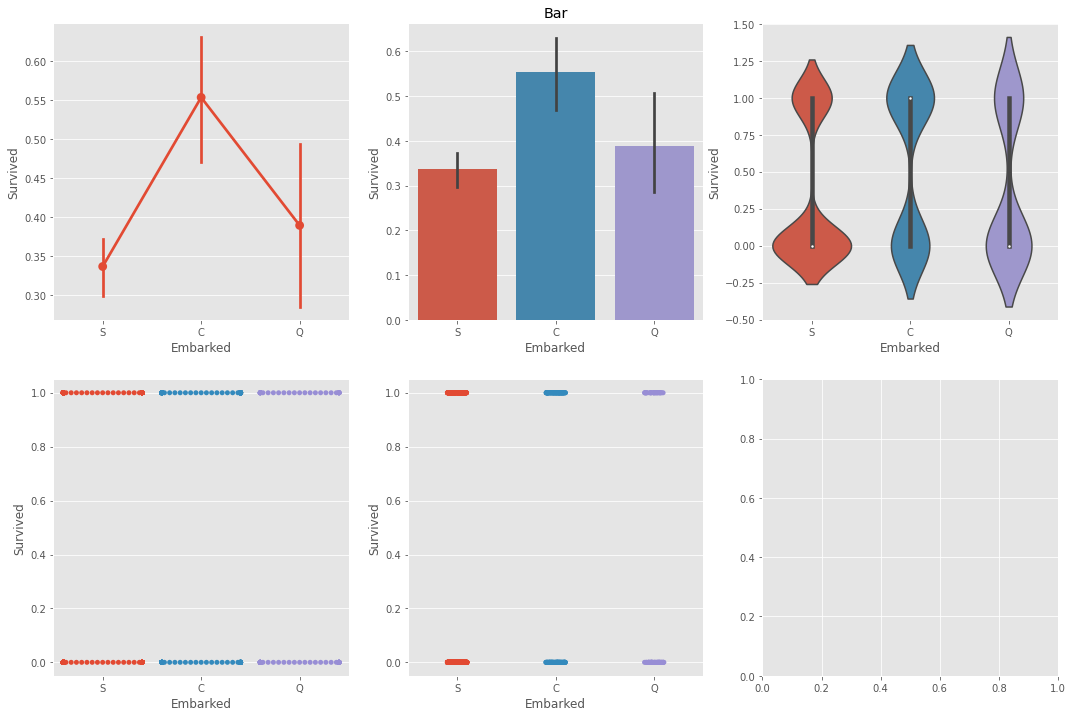

In [34]:
f,ax = plt.subplots(2,3,figsize=(18,12))

# ax[0,0].set_title('Foo')
sns.pointplot(x='Embarked',y='Survived', data=train, ax=ax[0][0])
sns.barplot(x='Embarked',y='Survived', data=train, ax=ax[0][1])
sns.violinplot(x='Embarked',y='Survived', data=train, ax=ax[0][2])
sns.swarmplot(x='Embarked',y='Survived', data=train, ax=ax[1][0])
sns.stripplot(x='Embarked',y='Survived', data=train, ax=ax[1][1])

# sns.catplot(x='Embarked',y='Survived', kind='point', data=train);
# sns.catplot(x='Embarked', kind='count', data=train, ax=ax[1]);

# sns.catplot(x='Embarked',y='Survived', kind='point', data=train);
# sns.catplot(x='Embarked', kind='count', data=train);

ax[0,1].set_title('Bar')
# plt.grid()  #just add this

plt.show()


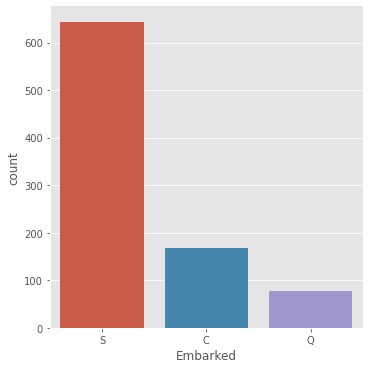

In [35]:
sns.catplot(x='Embarked', kind='count', data=train);


In [36]:
train.groupby(['Survived','Pclass','Sex'])['Survived'].count()

Survived  Pclass  Sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
Name: Survived, dtype: int64

In [37]:
train.groupby(['Survived','Sex','Pclass'])['Survived'].count()

Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: Survived, dtype: int64

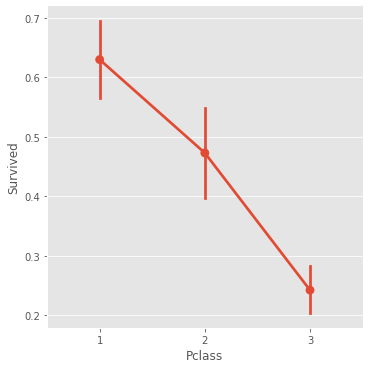

In [38]:
sns.catplot(x='Pclass',y='Survived', kind='point', data=train);

In [39]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

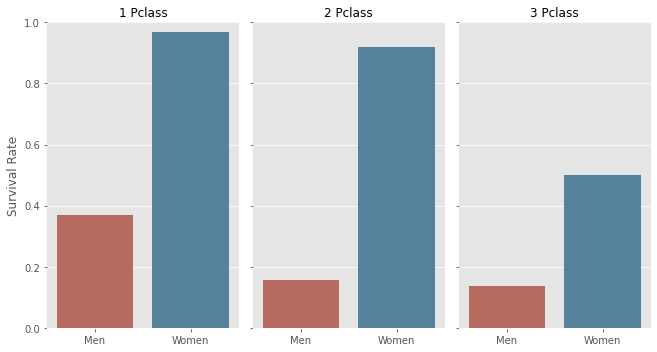

In [40]:
# https://seaborn.pydata.org/generated/seaborn.catplot.html - Bottom of page
# FacetGrid

g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                data=train, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Men", "Women"]) # , "Children"
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True));  

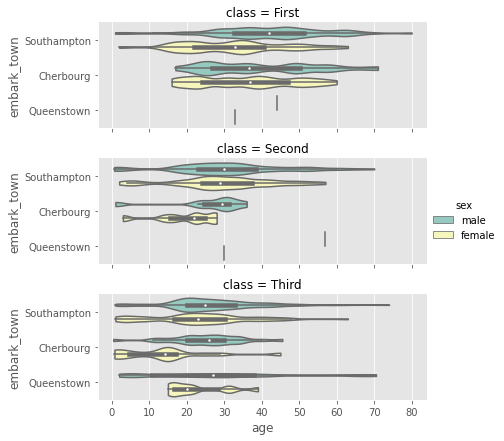

In [41]:
titanic = sns.load_dataset("titanic")

g = sns.catplot(x="age", y="embark_town",
                hue="sex", row="class",
                data=titanic[titanic.embark_town.notnull()],
                orient="h", height=2, aspect=3, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2)


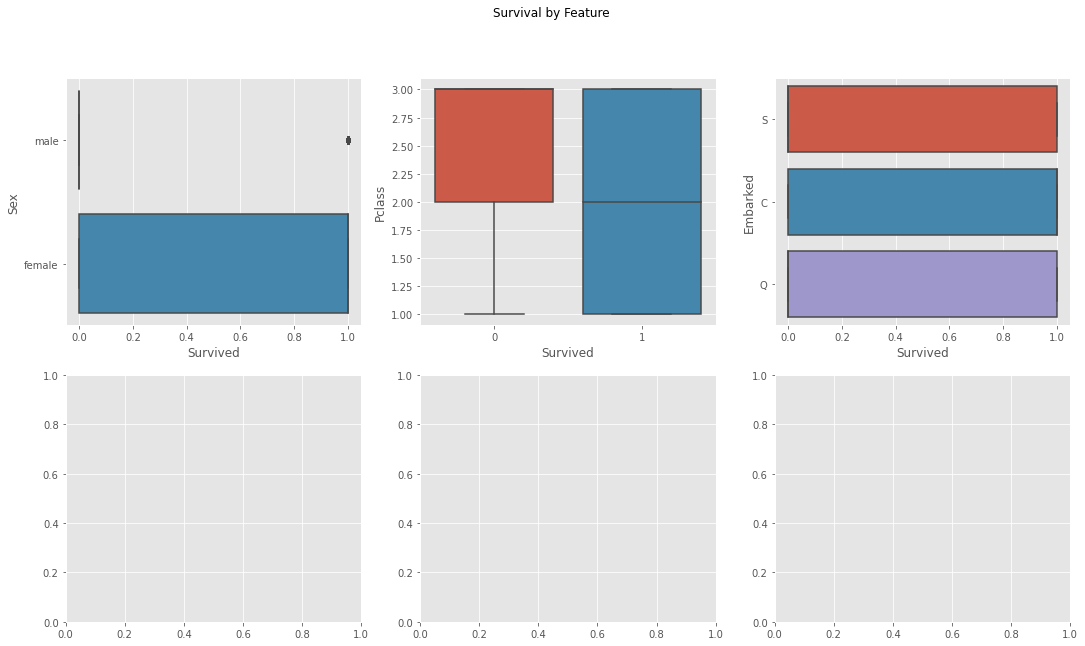

In [42]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Survival by Feature')

sns.boxplot(ax=ax[0, 0], data=train, x='Survived', y='Sex');
sns.boxplot(ax=ax[0, 1], data=train, x='Survived', y='Pclass');
sns.boxplot(ax=ax[0, 2], data=train, x='Survived', y='Embarked');


# Correlation Matrix

### Fill in missing values first?

In [43]:
corr = train.corr()

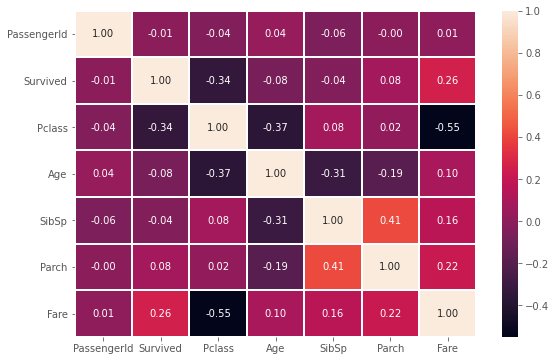

In [44]:
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

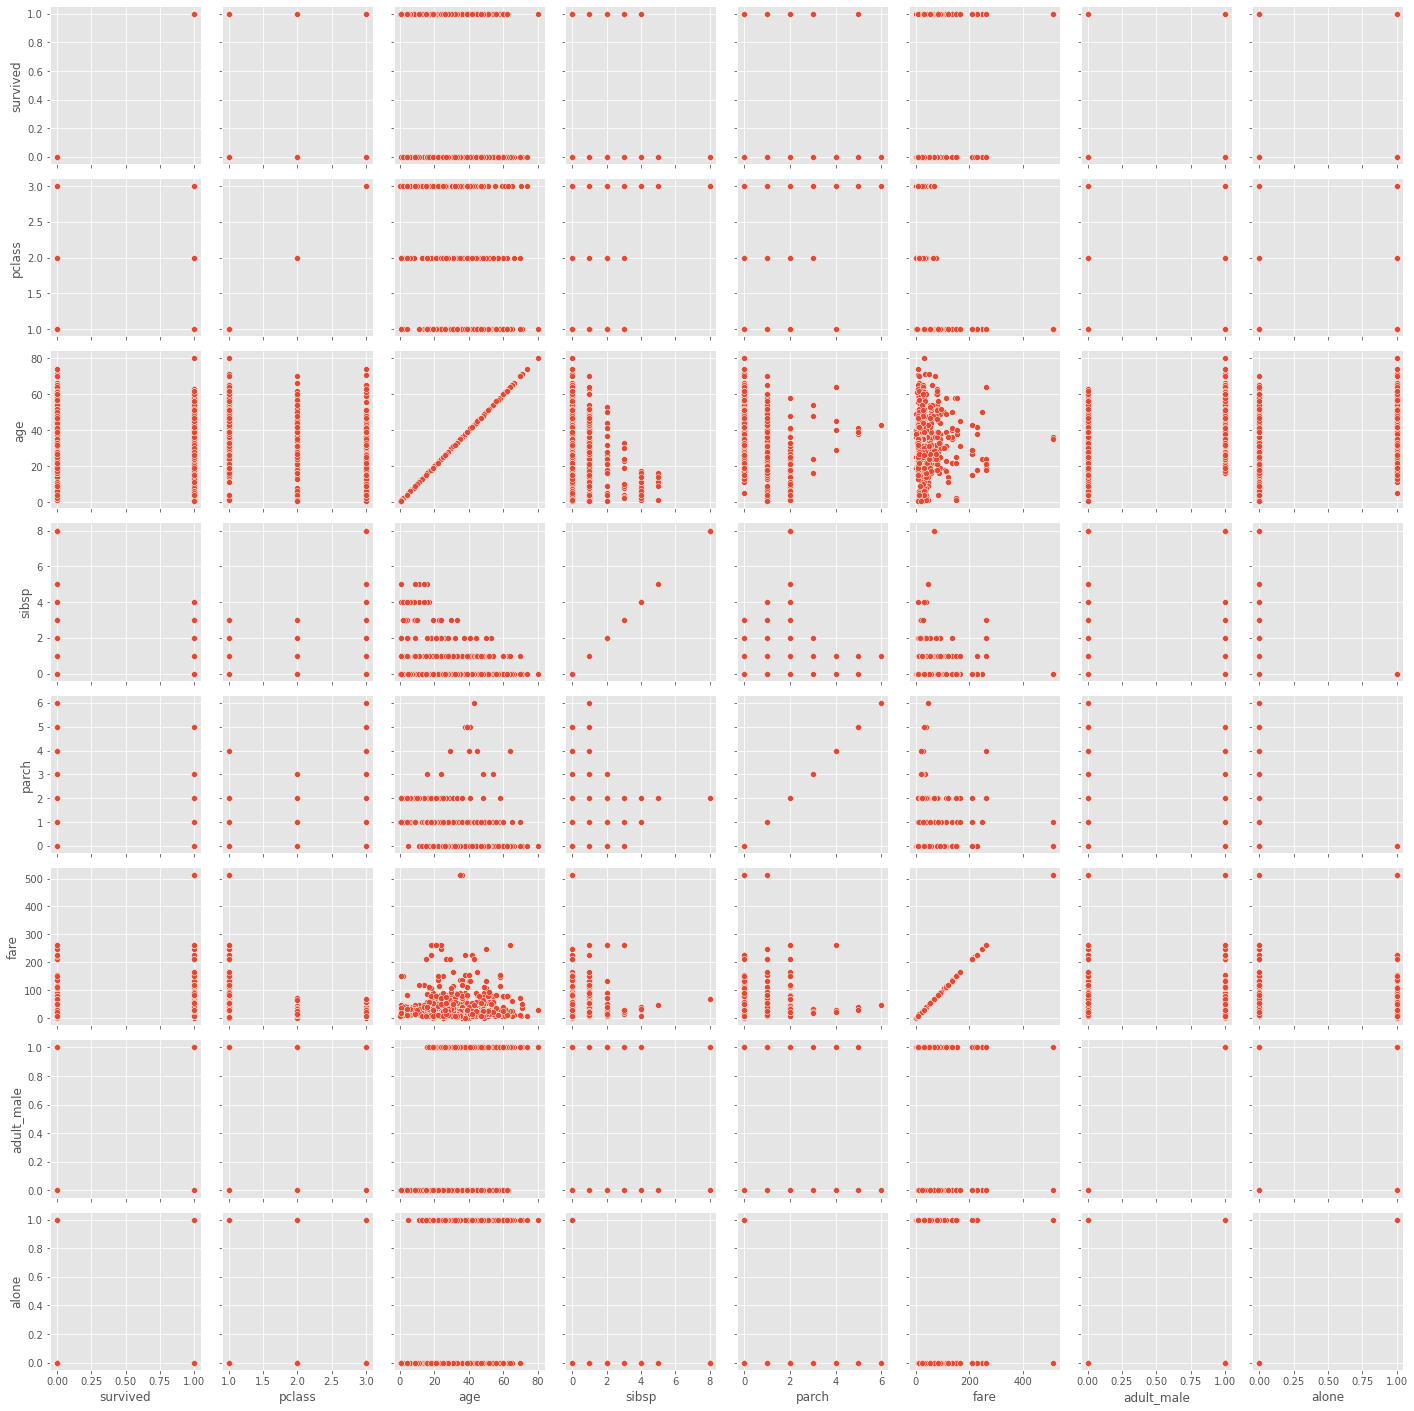

In [45]:
# https://seaborn.pydata.org/tutorial/axis_grids.html

titanic = sns.load_dataset("titanic")
g = sns.PairGrid(titanic)
g.map(sns.scatterplot);


In [46]:
corr_matrix = train.corr()[['Survived']].sort_values(by = ['Survived'], ascending = False).drop(['Survived']).T
corr_matrix.style.set_precision(4)
# corr_matrix.style.background_gradient(cmap = 'coolwarm').set_precision(4)


,Fare,Parch,PassengerId,SibSp,Age,Pclass
Survived,0.2573,0.0816,-0.0050,-0.0353,-0.0772,-0.3385


In [47]:
# TARGET = "Survived"

corr_matrix = train.corr()[[TARGET]].sort_values(by = [TARGET], ascending = False).drop([TARGET]).T
corr_matrix.style.set_precision(4)
# corr_matrix.style.background_gradient(cmap = 'coolwarm').set_precision(4)


,Fare,Parch,PassengerId,SibSp,Age,Pclass
Survived,0.2573,0.0816,-0.0050,-0.0353,-0.0772,-0.3385
